Consider two independent variables, fuel consumption in litres (fuel) and distance travelled in kilometers (dist) along with a dependent variable budget in dollars (budget).

Epoch 1 | Loss: 0.0239
Epoch 11 | Loss: 0.0206
Epoch 21 | Loss: 0.0204
Epoch 31 | Loss: 0.0203
Epoch 41 | Loss: 0.0203
Epoch 51 | Loss: 0.0203
Epoch 61 | Loss: 0.0203
Epoch 71 | Loss: 0.0202
Epoch 81 | Loss: 0.0202
Epoch 91 | Loss: 0.0202
Epoch 101 | Loss: 0.0202
Epoch 111 | Loss: 0.0202
Epoch 121 | Loss: 0.0201
Epoch 131 | Loss: 0.0201
Epoch 141 | Loss: 0.0201
Epoch 150 | Loss: 0.0201


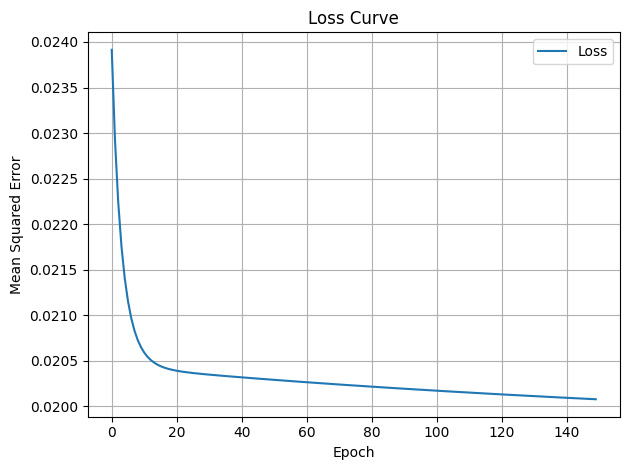

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Normalized sample data
X = np.array([[5, 40],
              [8, 82],
              [6, 52]], dtype=float)
y = np.array([[15],
              [24],
              [18]], dtype=float)

X = X / np.max(X, axis=0)  # Feature scaling
y = y / np.max(y)          # Target scaling

class Neural_Network:
    def __init__(self):
        self.inputSize = 2
        self.hiddenSize = 3
        self.outputSize = 1

        # Initial weights (same as your sample)
        self.W1 = np.array([[0.3, 0.2, 0.6],
                            [0.22, 0.56, 0.7]])  # shape (2,3)
        self.W2 = np.array([[0.21],
                            [0.45],
                            [0.85]])            # shape (3,1)

        self.losses = []  # Store loss at each epoch

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)

    def forward(self, X):
        self.z = np.dot(X, self.W1)        # Hidden layer input
        self.z2 = self.sigmoid(self.z)     # Hidden layer output
        self.z3 = np.dot(self.z2, self.W2) # Output layer input
        o = self.sigmoid(self.z3)          # Output
        return o

    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoidPrime(o)

        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)

        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)

    def train(self, X, y, epochs=150):
        for i in range(epochs):
            o = self.forward(X)
            self.backward(X, y, o)
            loss = np.mean(np.square(y - o))
            self.losses.append(loss)
            if i % 10 == 0 or i == epochs - 1:
                print(f"Epoch {i+1} | Loss: {loss:.4f}")

    def plot_loss(self):
        plt.plot(self.losses, label='Loss')
        plt.title("Loss Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


# Train and plot
NN = Neural_Network()
NN.train(X, y)
NN.plot_loss()
